# Data Analysis with the Worldwide `Suicide Rates` dataset.

In this data analysis, I used the dataset from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).


**Just in case you haven't install `pycountry` and `geopandas` yet**

Open bash and run:
```bash
pip install pycountry
pip install geopandas
```

In [1]:
# import some essential packages

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# data analysis libraries
import numpy as np 
import pandas as pd
from scipy import stats
# interacting with the operating system
import os 
# pycountry provides the ISO databases
import pycountry
# package for Geovisualization
import geopandas

# importing and setting filter to ignore warnings
import warnings
warnings.filterwarnings('ignore') #warnings are not errors and are not critical; setting to ignore

In [2]:
# check the dataset

df = pd.read_csv('data/master.csv')

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Exploratory Data Analysis

Before I start diving deep into the analysis, I will do some initial data exploration and cleaning to familiarize myself with this specific dataset, each of the data columns, and how their contents might be useful to my analysis.

The steps taken in this section will help to determine whether are any missing or duplicated values or any other deficiencies and then I will clean up the data to ensure it's ready for the analysis.

In [3]:
# Looking at the columns names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Addressing column name formats:

Before I go any further, I can already see that the column names aren't consistent and intuitive, so I'm going to make that change and standardize the column names for readability.


In [4]:
# Rename some of the columns

df.rename(columns= {"suicides/100k pop" : "suicides_pop",
                   "HDI for year" : 'HDI_for_year',
                    "country-year" : "country_year",
                   " gdp_for_year ($) " : "gdp_for_year",
                   "gdp_per_capita ($)" : "gdp_per_capita"}, inplace = True)

# Check the column names
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country_year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [5]:
# Adjust the values of some columns:

# Change the data type of column "gdp_for_year" to int
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype(np.int64)

# Adjust the value in "age" column
df['age'] = df['age'].str.replace("5-14 years", "05-14 years")

### Checking for duplicated columns and rows:

In [6]:
# Checking for duplicated columns
print(f'There are {df.T.duplicated().sum()} duplicate columns in the dataset.')

# Checking for duplicated rows
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset.')

There are 0 duplicate columns in the dataset.
There are 0 duplicate rows in the dataset.


### Checking for Null values:

In [7]:
df.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_pop          0
country_year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [8]:
# Checing what % of the dataset these null value represent

df.isna().sum()/df.shape[0]

country           0.000000
year              0.000000
sex               0.000000
age               0.000000
suicides_no       0.000000
population        0.000000
suicides_pop      0.000000
country_year      0.000000
HDI_for_year      0.699353
gdp_for_year      0.000000
gdp_per_capita    0.000000
generation        0.000000
dtype: float64

As we can see the column `HDI_for_year` has 19,456 null values. As we know HDI stands for **Human Development Index** which is "a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living" (according to [hdr.undp.org](http://hdr.undp.org/en/content/human-development-index-hdi)).
While we don't have any alternate solution to fill in these null values; Therefore, we can drop this column instead of dropping the rows that corresponding to the null values.


In [9]:
df.drop(['HDI_for_year'], axis=1 , inplace = True)

df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


Checking the sucide trend in terms of sex through out the years:

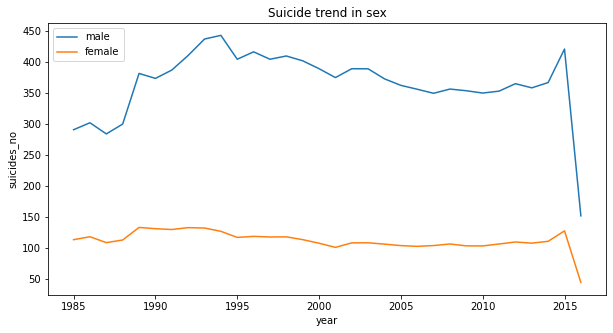

In [10]:
plt.figure(figsize=(10,5))

sns.lineplot(df[df.sex == 'male'].year, df.suicides_no, ci = None)
sns.lineplot(df[df.sex == 'female'].year, df.suicides_no, ci = None)
plt.legend(['male', 'female'])
plt.title('Suicide trend in sex')
plt.show()

From the the line chart, we can see from 1985 to 2016, the suicides number of **male** has been always higher than female about **three times**.

Let check the sucide trend in terms of age.

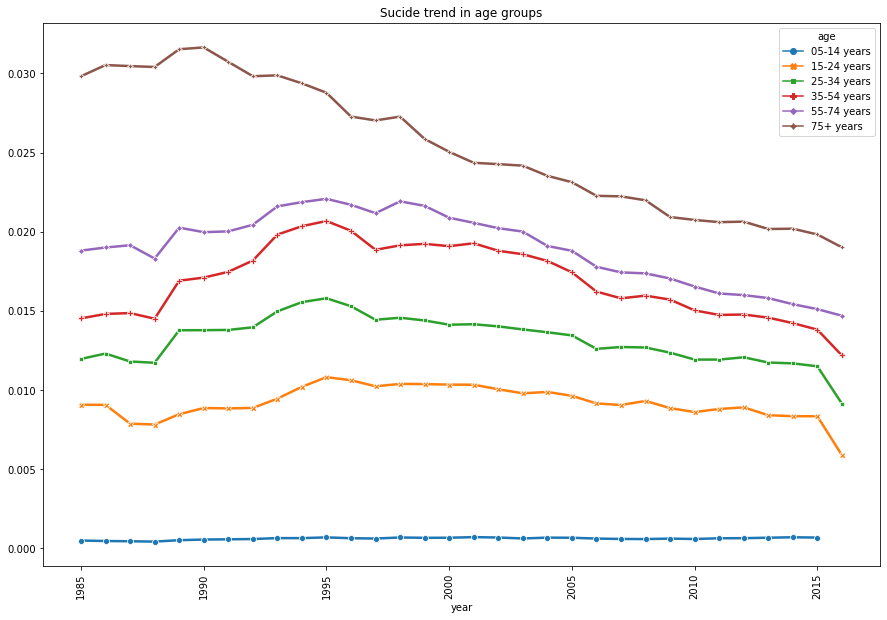

In [11]:
df_age = df.groupby(["year", "age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()

plt.figure(figsize=(15,10))
sns.lineplot("year", (df_reset.suicides_no/ df_reset.population)* 100, hue = 'age',
            data = df_reset, linewidth = 2.5, style = 'age' , markers = True, dashes = False)
plt.xticks(rotation = 90)
plt.title('Sucide trend in age groups')
plt.show()

It's quiet predictable that the suicide rate is getting higher when the age is higher. Therefore, we can say age is one of the major factor of suicide.

Let see how the suicide trend in terms of the **generation**:

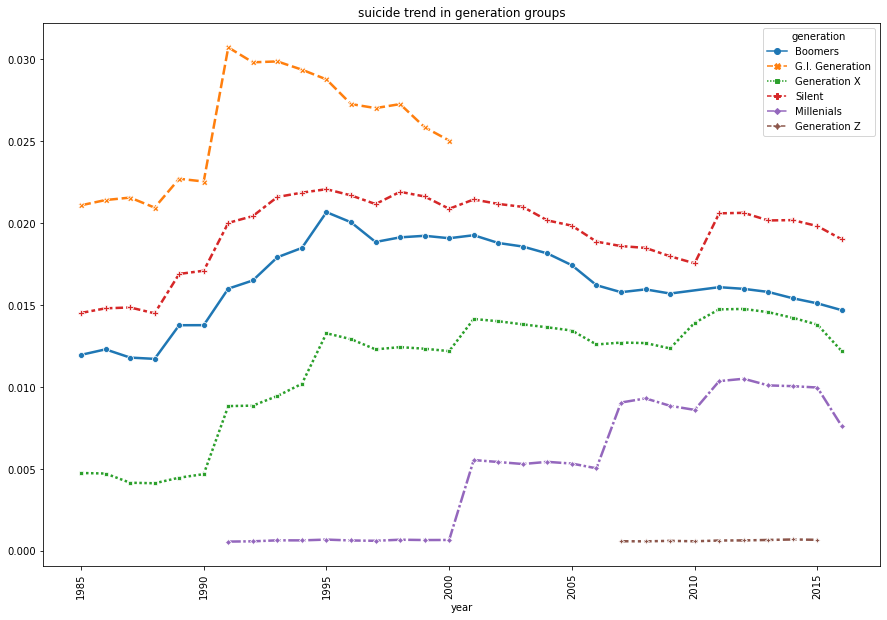

In [12]:
df_generation = df.groupby(["year", "generation"])['suicides_no', "population"].sum()
df_generation_reset = df_generation.copy().reset_index()

plt.figure(figsize=(15,10))
sns.lineplot("year", df_generation_reset.suicides_no*100/ df_generation_reset.population, hue = 'generation',
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers = True, dashes = True)
plt.xticks(rotation = 90)
plt.title('suicide trend in generation groups')
plt.show()


|    <strong>Generations</strong>        |  Description                                        |
|-------------------|-----------------------------------------------------|
|<strong>G.I. Generation aka The Greatest Generation</strong>  | Born before 1928                               |   
|<strong>The Silent Generation</strong>         | Born from 1928 - 1945     |   
|<strong>The Baby Boomer Generation</strong>         | Born from 1946-1964                                    |
|<strong>Generation X</strong>   | Born from 1965-1980   |
|<strong>The Millennials</strong>       | Born from 1981-1996                            |
|<strong>Generation Z</strong>    | Born from 1997-2012                            |

We can see an interesting trend from the line chart. 
* Before 2000, `G.I. Generation` (The Greatest Generation) has the highest suicide rate. We know the fact that G.I. Generation is also known as WW2 generation. They severely suffered from not only the worldwide great depression but also the big war that caused; Therefore, this generation were exhausted both physically and mentally. 
* From the example of G.I. Generation that they had experienced the economic and social turmoil. Is it a general factor that can impact the suicide rate for other generations? However, comparing with the G.I.,the Silent generation is not that high.
* Noticeably, Generation X and Millenials suicide rate have increased steadily. It could be a trend that when young people are more independent or moving out from their family could impact the suicide rate.

Let check how many countries are in the dataset, then we can calculate the suicide rate of the countries.

In [13]:
# Total numbers of suicide per country 
df_country = df.groupby("country")["suicides_no"].sum()

# Get the country name
country_name = list(df_country.index.get_level_values(0))

# Total numbers of country
len(country_name)

101

Before finding the suicide rate, we can convert the country name into country code. In this case, we choose Alpha-3 country code. For example, for Afghanistan => Alpha-2 code: AF and Alpha-3 code: AFG.

In [14]:
# using pycountry to get the country code

countries = {}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

Let double check in case we missed some country names that didn't follow the standard.

In [15]:
country_not_in_list = [i for i in country_name if i not in countries.keys()]

print(f'we are missing {len(country_not_in_list)} countries, they are: {country_not_in_list}')

we are missing 4 countries, they are: ['Czech Republic', 'Macau', 'Republic of Korea', 'Saint Vincent and Grenadines']


Let's rename the 4 countries:

In [16]:
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace("Czech Republic", "Czechia", inplace = True)
df.replace("Macau", "Macao", inplace = True)
df.replace("Saint Vincent and Grenadines", "Saint Vincent and the Grenadines", inplace = True)

Let calculate the suicide rate for each year then take the evarage of number as rate:

In [17]:
# Total number of suicide by country and year
df_suicide_num = df.groupby(["country","year"])["suicides_no"].sum()

# Total population by country and year
df_pop = df.groupby(["country", "year"])['population'].sum()

# Suicide Rate by country and year
df_rate = df_suicide_num / df_pop *100

df_rate.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [18]:
# Create a dictionary for countries
country_dict = {}

# Get the mean of suicide rate per country
for country in df_rate.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_rate[country].mean()
    else: pass

# Create a list of country_dict to a variable
tup = list(country_dict.items())

# Take the second element to sort with lambda function
tup.sort(key= lambda pair:pair[1], reverse = True)

# Assign the country names and suicide rates into variables
country_list = [num[0] for num in tup]
country_suicide = [num[1] for num in tup]

Let's plot the top 20 countries that have highest suicide rate

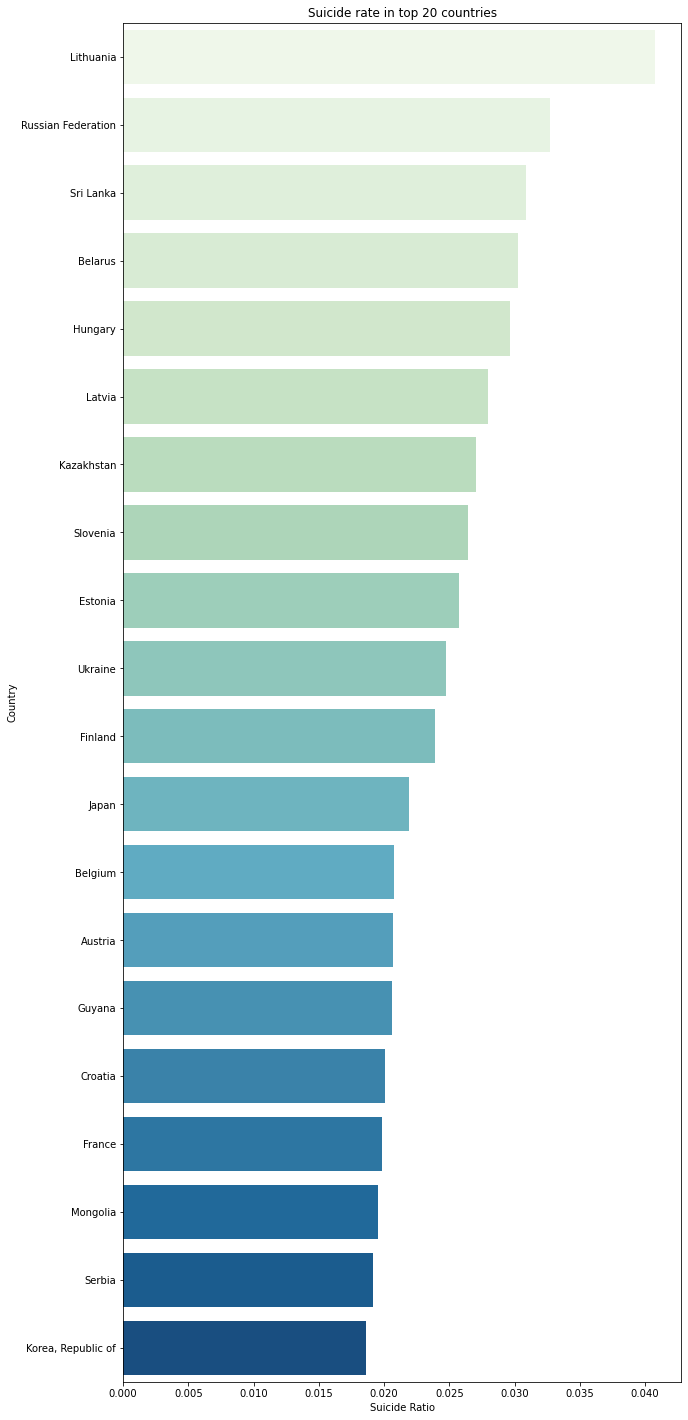

In [19]:
plt.figure(figsize= (10,25))
sns.barplot(x = country_suicide[:20], y = country_list[:20], palette = "GnBu")
plt.xlabel("Suicide Ratio")
plt.ylabel("Country")
plt.title("Suicide rate in top 20 countries")
plt.show()

It appears that `Lithuania`, `Russian Federation`, and `Sri Lanka` share the highest suicide rate among the country list respectively. 

According to an article from website [LRT](https://www.lrt.lt/en/news-in-english/19/1146277/despite-positive-changes-social-problems-persist-in-lithuania-eu-commission), we can see there are some issues that `Lithuania` is currently facing that are the **income inequality** and **social exclusion**. Additionally, Lithuania's education improvement seems to experience the slow change that need more long-term strategy in order to boost the effiency. Morevoer, from the article, "the overal health of the Lithuanian population remains among the worst in the EU and the country has the one of the **highest treatable and preventable mortality rate** in the bloc".

Meanwhile according to a survey from [statista](https://www.statista.com/statistics/1054428/societal-problems-worrying-russians/), `Russian Federation` seems to share the similar societal problems as `Lithuania` does. **Price increase** , **Poverty, improverishment of majority of the population**,and **Unavailability of many types of medical services** are highly worried by the Russian from the survey that conducted in February, 2021 by **1,601 repsondents**.

However, according to an article [Sri Lanka Events of 2020](https://www.hrw.org/world-report/2021/country-chapters/sri-lanka), Sri Lankian are suffering from more societal issues than Lithuanian and Russian since they are country_liststill dealing with Human Rights which are essentially causing a big impact to the society. The citizen don't have **the freedoms of expression and association** that on April 1, 2020, "police announced that anyone "criticising" the goverenment's reponse to the Covid-19 pandemic would be arrested". The **Women's Rights** are also having lots of problems because the majority of Sri Lankian women has to work in the garment factories but due to Covid-19, women have suffered from wage loss, unemployment and they can hardly ask for the government support to go through the difficult time.

In [20]:
# Save the alpha3 format
country_dict = dict()
for idx in range(len(country_list)):
    country_dict[countries[country_list[idx]]] = country_suicide[idx]

# Let change the country names to the alpha3 format
new_country_dict = {}
new_country_dict['iso_a3'] = list(country_dict.keys())
new_country_dict['suicide_rate'] = list(country_dict.values())

# Assign into a dataframe
new_country_df = pd.DataFrame(new_country_dict)

new_country_df.head()

,iso_a3,suicide_rate
0,LTU,0.040736
1,RUS,0.032703
2,LKA,0.030848
3,BLR,0.030231
4,HUN,0.029617


In [21]:
# Let use geopandas to get the information of countries 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [22]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [23]:
# Let's merge 2 dataframe together

merge = pd.merge(world, new_country_df, on = "iso_a3")

merge.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,suicide_rate
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.003708
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.013131
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.012835
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.027041
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",0.007232


<AxesSubplot:title={'center':'Worldwide suicide rate'}>

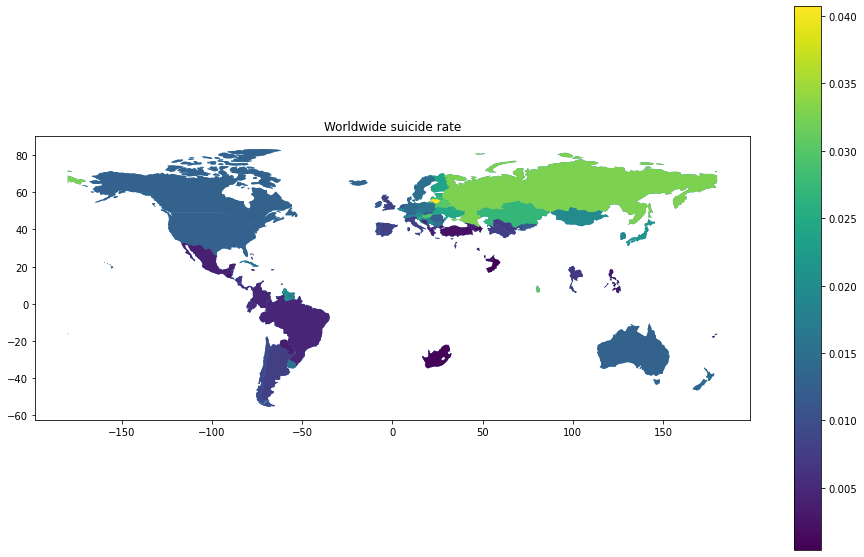

In [24]:
# Let plot the suicide rate with the map

ax = merge.plot(figsize= (16,10))
ax.set_title("Worldwide suicide rate")
merge.plot(column = "suicide_rate", ax = ax, legend = True)

From the graph, we can quickly see that the majority of the "high suicide rate" area is from the former Soviet Union locating in eastern Europe and Russia. Additionally, Japan and Korea are also in the high rate area.

Let's check the suicide rate by year.


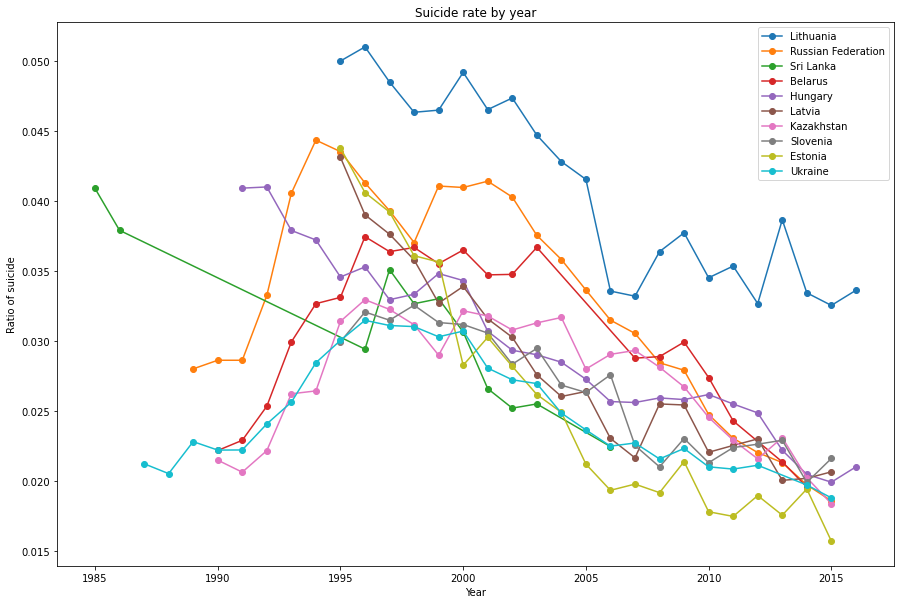

In [25]:
plt.figure(figsize = (15,10))

for country in country_list[:10]:
    plt.plot(df_rate[country].index, df_rate[country].values, label= country, marker= "o")

plt.xlabel('Year')
plt.ylabel('Ratio of suicide')
plt.title("Suicide rate by year")
plt.legend()
plt.show()

It's clearly to see that the suicide rate in top 10 countries significantly decreased after 1990. However, the suicide rate in other countries are pretty high in the 1990-2000 period. In the top 10 countries, the former Soviet Union countries took a high share since **the transisiton to the economy and democracy** could be one of the crucial reason. 

Moreover, along with the development of technology, there have been a countless of studies about the increase in mortality, for instance, drugism, alcoholism, economic hardship, modern depression epidemic and so on. But is mortality crisis is the most significant factor?

Let's check the GDP per capita by year.

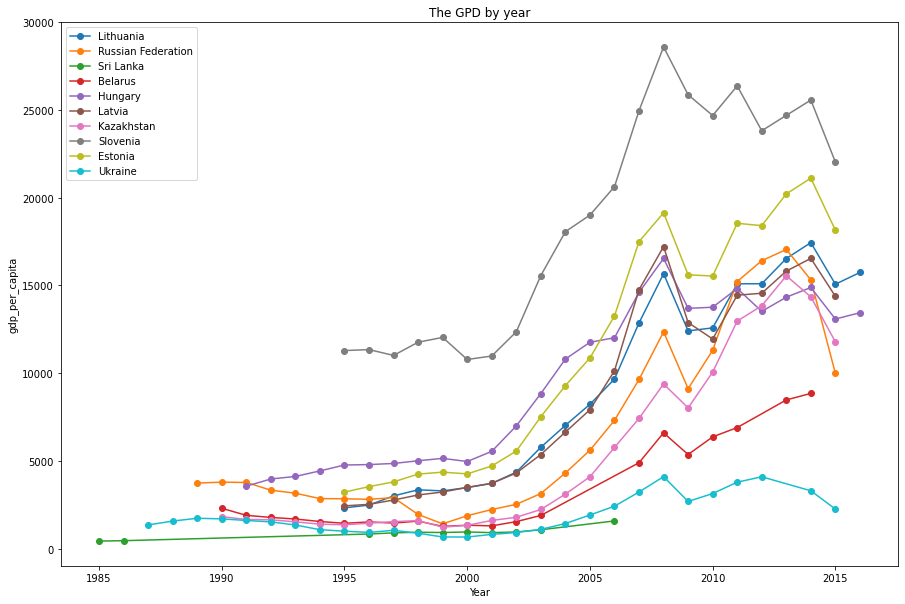

In [26]:
plt.figure(figsize=(15,10))

# assign the gpd per capita
df_gdp = df.groupby(["country", "year"]).gdp_per_capita.mean()

# plot the trend of gdp throughout the year
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,  df_gdp[country].values, label= country, marker = "o")
plt.xlabel('Year')
plt.ylabel("gdp_per_capita")
plt.title('The GPD by year')
plt.legend()
plt.show()

From the graph, we can clearly see that the `gdp_per_capita` had no significant difference during the 1990 to 2000. In other words, the economic situation were remain stagnant and there several countries economy got worse around 2000. Only after 2005, the overall gpd started increasing.

Noticably, due to the financial crisis in 2008, we see the whole `gdp_per_capita` dropped significantly. After that the trend seems to fluctuate but the ratio was still positive than before 2000.

In order to see the relationship between `suicide rate` and `gdp_per_capita`, we can plot the regression plot of two parameters.


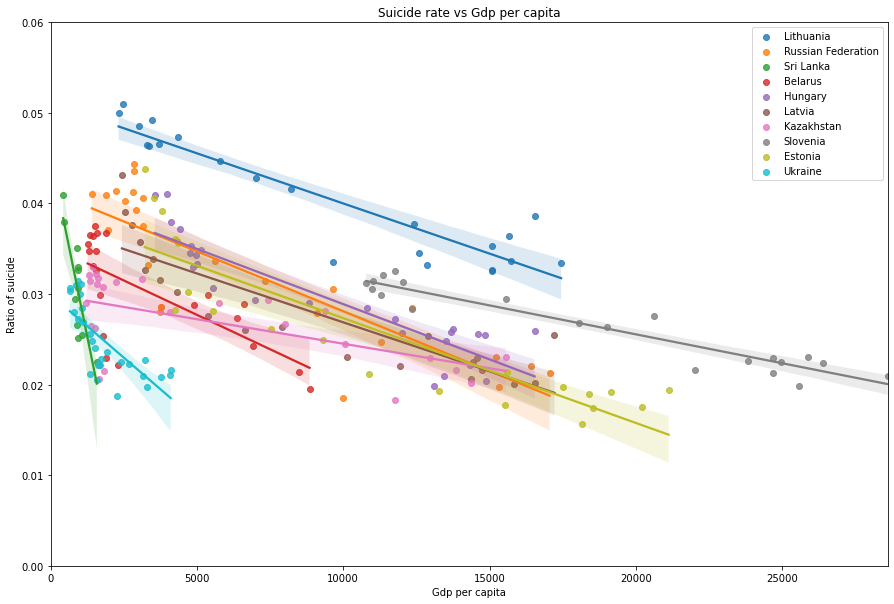

In [27]:
plt.figure(figsize=(15,10))
for country in country_list[:10]:
    sns.regplot(x= df_gdp[country].values, y= df_rate[country].values, label= country)
plt.xlabel("Gdp per capita")
plt.ylabel("Ratio of suicide")
plt.title("Suicide rate vs Gdp per capita")
plt.ylim(0, 0.06)
plt.xlim(0)
plt.legend()
plt.show()

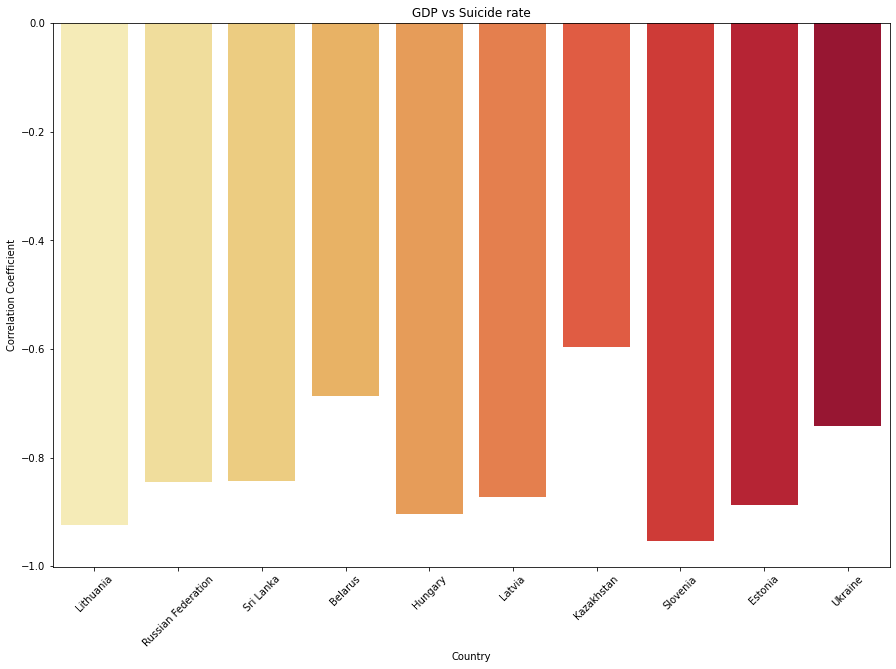

In [28]:
# create a dictionary for the coefficent
coef = {}

# get the linear relationship between gdp_per_capita & suicide rate
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_rate[country].values)
    coef[country] = float(r_value)

# plot the bar chart
plt.figure(figsize=(15,10))
sns.barplot(x= list(coef.keys()), y=list(coef.values()), palette= "YlOrRd")
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Correlation Coefficient")
plt.title("GDP vs Suicide rate")
plt.show()

As we predicted, the suicide rate is *highly correlated to the `gdp_per_capita` of the top 10 countries. Let's see whether other countries share the similar trend with the top 10.

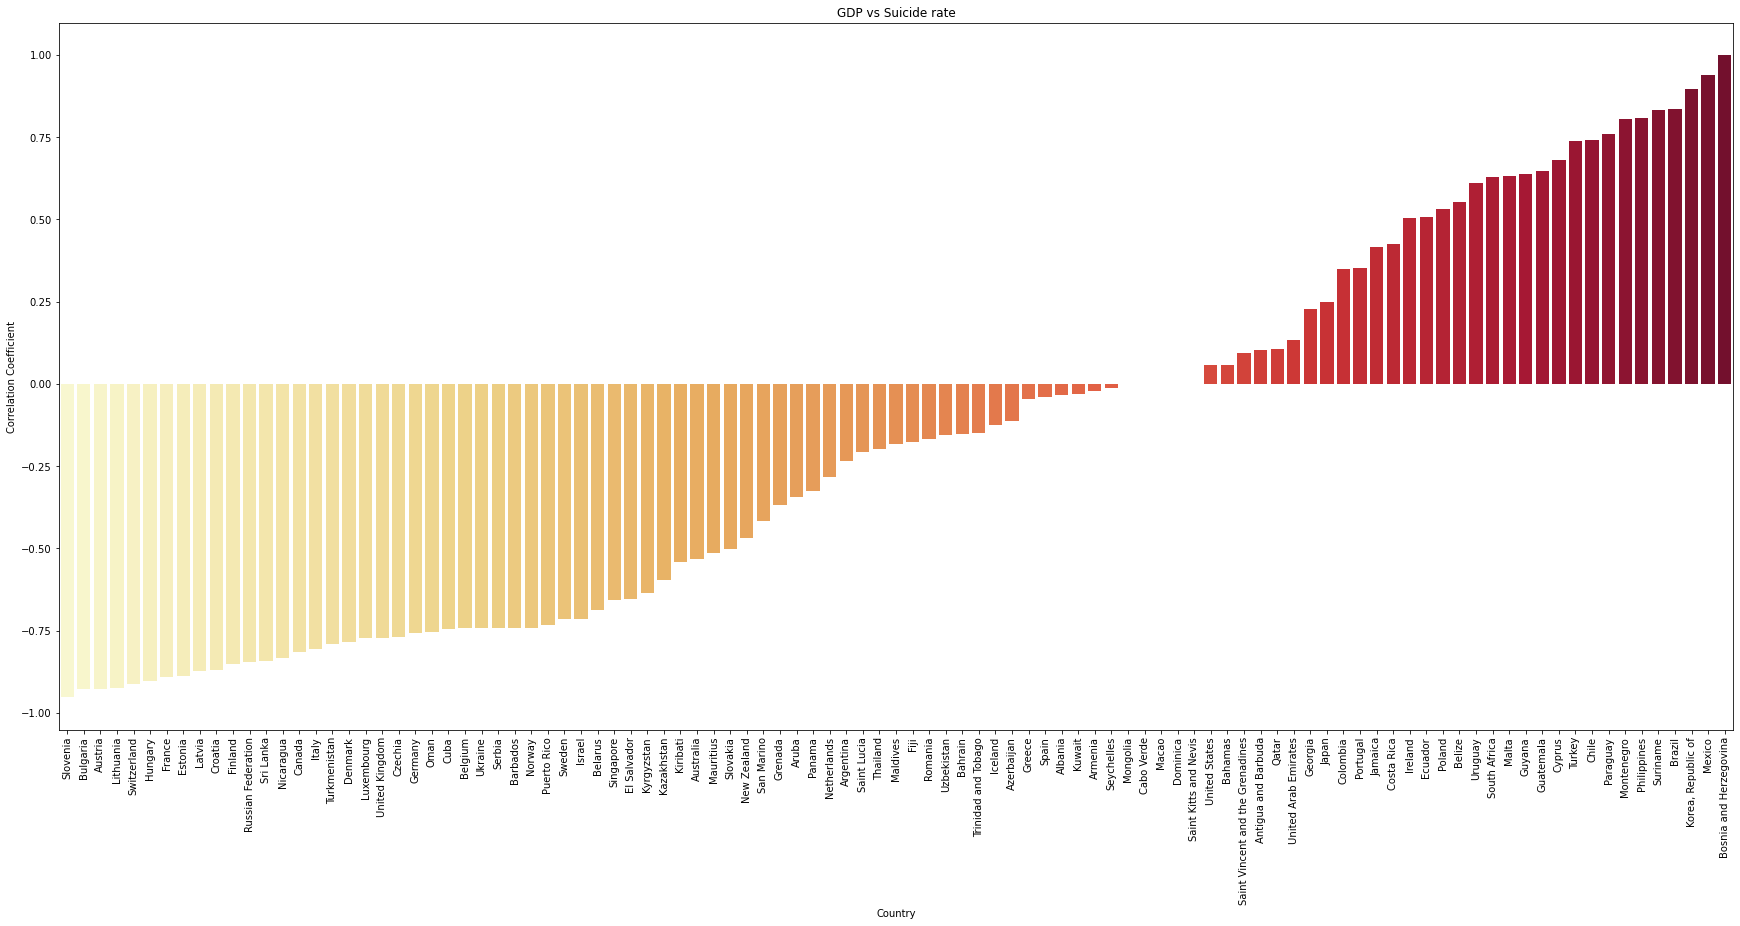

In [29]:
# create a dictionary for the coefficent
coef = {}
p_val = {}

# get the linear relationship between gdp_per_capita & suicide rate
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_rate[country].values)
    coef[country] = float(r_value)
    p_val[country] = float(p_value)
    
gdp_tup = list(coef.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse= False)
gdp_relation = {a[0]:a[1] for a in gdp_tup}

# plot the bar chart
plt.figure(figsize=(30,13))
sns.barplot(x= list(gdp_relation.keys()), y=list(gdp_relation.values()), palette= "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("Correlation Coefficient")
plt.title("GDP vs Suicide rate")
plt.show()

Interestingly, while lots of countries' suicide rate are negatively high related to the `gdp_per_capita`, but there quite a number of countries have the opposite outcome!

Let's check how many countries with the correlation coefficient below **-0.6**.

In [30]:
high_corr_gdp ={a:b for a,b in gdp_relation.items() if b <= -0.6 }

print(f'There are: {len(high_corr_gdp)} countries over {len(gdp_relation)} countries.')

high_corr_gdp

There are: 36 countries over 101 countries.


{'Slovenia': -0.9529455791278115,
 'Bulgaria': -0.9287679102475699,
 'Austria': -0.9259200512084546,
 'Lithuania': -0.9239757987267332,
 'Switzerland': -0.9109503853299824,
 'Hungary': -0.9040354533627301,
 'France': -0.891033016219988,
 'Estonia': -0.8871441228139314,
 'Latvia': -0.8730699831833393,
 'Croatia': -0.8688905854455009,
 'Finland': -0.8510603475107352,
 'Russian Federation': -0.8447320241371792,
 'Sri Lanka': -0.8423723520534465,
 'Nicaragua': -0.833946119578559,
 'Canada': -0.8137269827924936,
 'Italy': -0.8058989652804354,
 'Turkmenistan': -0.789798470389873,
 'Denmark': -0.7850307502556487,
 'Luxembourg': -0.7712677174711061,
 'United Kingdom': -0.7709229981372075,
 'Czechia': -0.7706689026781652,
 'Germany': -0.7567584036061584,
 'Oman': -0.7547353920453065,
 'Cuba': -0.7437036777206897,
 'Belgium': -0.7416790406841788,
 'Ukraine': -0.741356236777787,
 'Serbia': -0.7411928190991897,
 'Barbados': -0.7409526707249006,
 'Norway': -0.7406431335510837,
 'Puerto Rico': -0.73

There are about **one third of the countries** that have high relationship with `gdp_per_capita`. We can confident to say that GDP is one of the factors contributing to the high suicide rate.

Let's check the countries that have the relation coefficient are higher than **0.6**.

In [31]:
# Filter only the countries with coef > 0.6
pos_corr_gdp = {a:b for a,b in coef.items() if b > 0.6}
pos_corr_tup = list(pos_corr_gdp.items())
# Sort the values
pos_corr_tup.sort(key= lambda pair:pair[1], reverse= True)
pos_corr = {a[0]:a[1] for a in pos_corr_tup}

print(f'There are: {len(pos_corr)} countries over {len(gdp_relation)} countries.')

pos_corr

There are: 16 countries over 101 countries.


{'Bosnia and Herzegovina': 0.9999999999999999,
 'Mexico': 0.9392731898535472,
 'Korea, Republic of': 0.8967892885653612,
 'Brazil': 0.8356111067311864,
 'Suriname': 0.8333078326024657,
 'Philippines': 0.8099497394094539,
 'Montenegro': 0.8042382321252368,
 'Paraguay': 0.7599968993976424,
 'Chile': 0.741226520825395,
 'Turkey': 0.7398789818429374,
 'Cyprus': 0.6812947745988277,
 'Guatemala': 0.6460477591267608,
 'Guyana': 0.6379567025207804,
 'Malta': 0.6334189190517482,
 'South Africa': 0.6287573335302015,
 'Uruguay': 0.6120604681710502}

Let's check the suicide rate and `gdp_per_capita` of these countries.

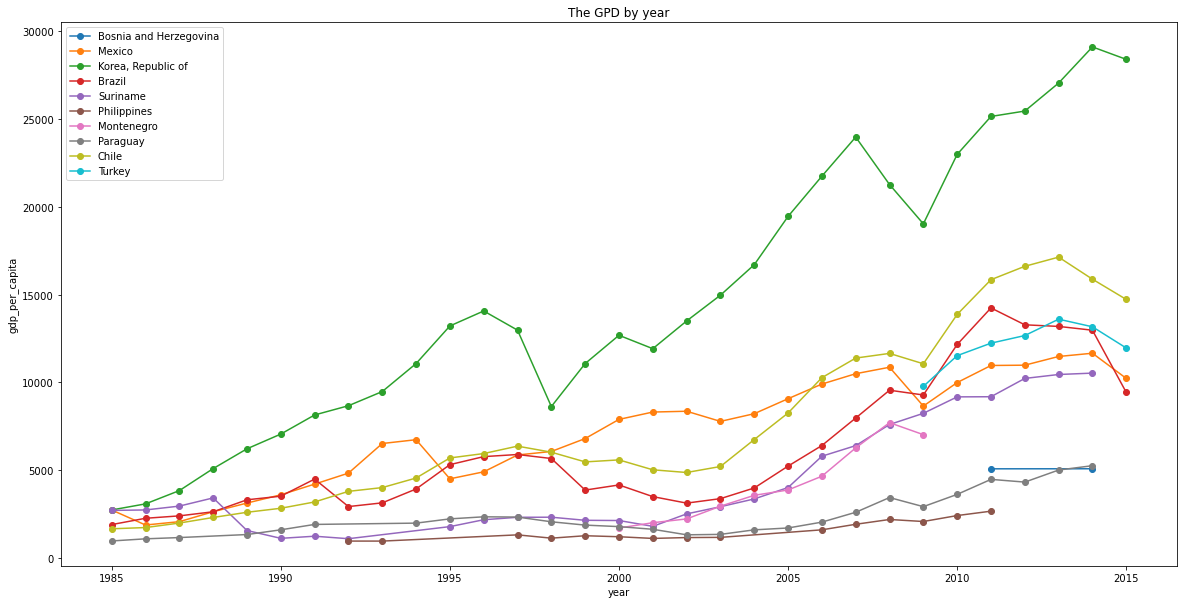

In [32]:
plt.figure(figsize=(20,10))

city_list = list({a:b for a,b in pos_corr.items()})
for country in city_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
    
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.title('The GPD by year')
plt.legend()
plt.show()



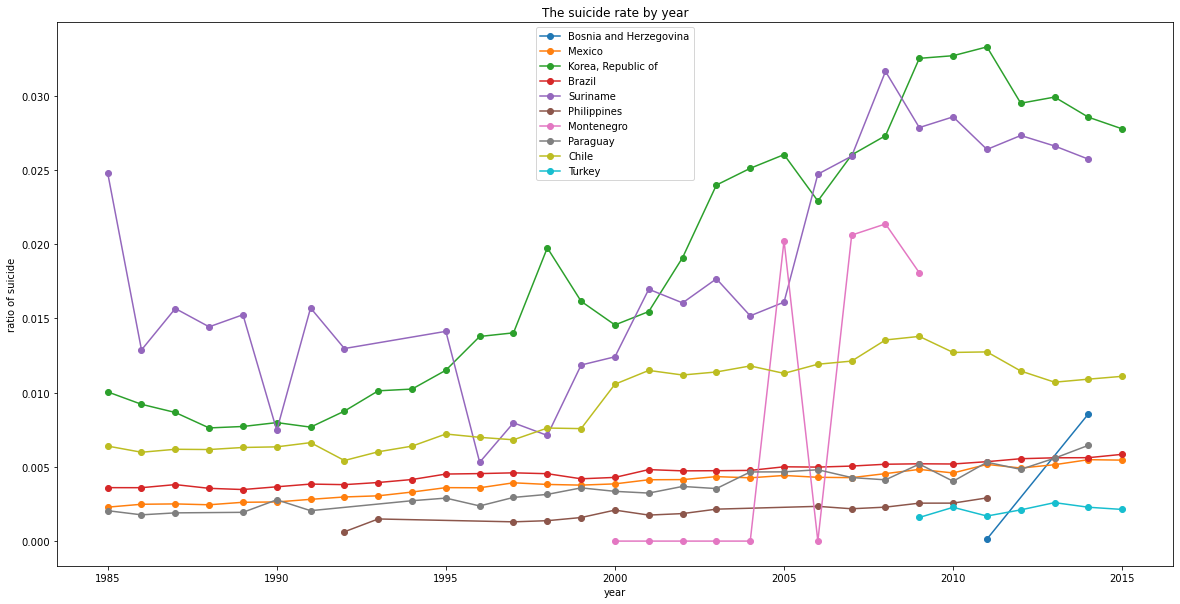

In [33]:
plt.figure(figsize=(20,10))

for country in city_list[:10]:
    plt.plot(df_rate[country].index,df_rate[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.title('The suicide rate by year')
plt.legend()
plt.show()

There's a strange point here since the `gdp_per_capita` of **Korea** is the highest of the list as well as the suicide rate! There should be some social problems that cause the high suicide rate.

Let's dive deep into Korea to find any insight from the numbers.

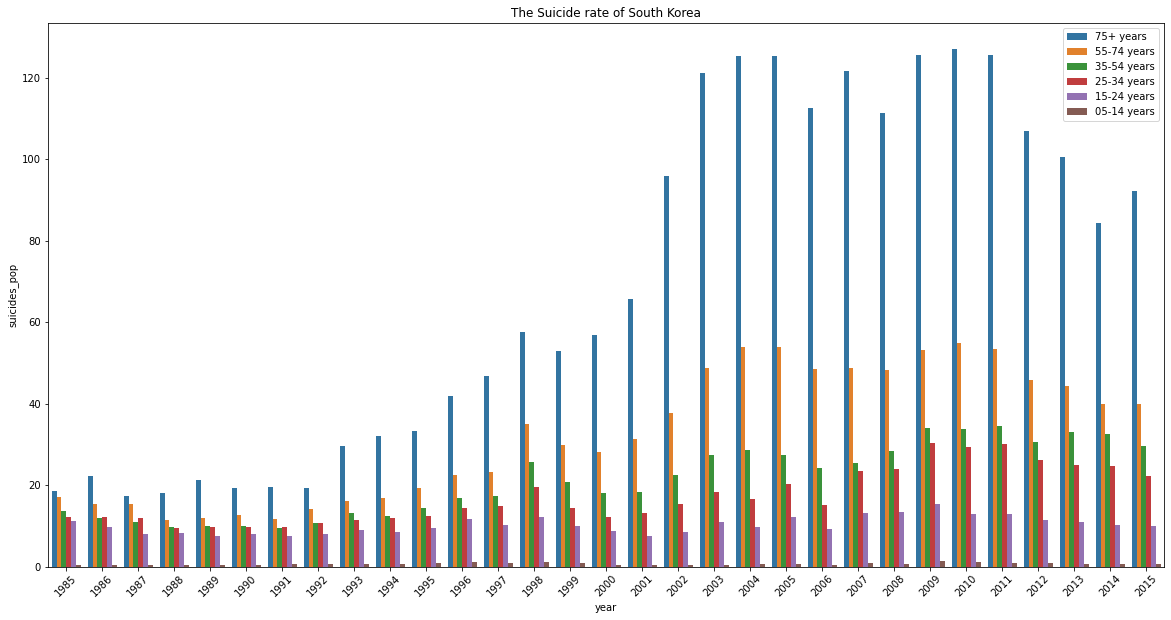

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x="year", y="suicides_pop", hue="age",
           ci = None, data = (df[df["country"] == "Korea, Republic of"]))
plt.xticks(rotation= 45)
plt.title("The Suicide rate of South Korea")
plt.legend()
plt.show()

There are some insights and quesions that we can draw from the graph:
* After 2000, the suicide rate of people over 75 years old is almost double.
* Was the Korea society not friendly with the seniors or there was no support from the Government for the seniors?
* Have the society considered the seniors as the family burdens that cause the depression among the seniors?
* Should the Government offer some kinds of social welfare to take care of old people so they don't have to rely on their family financially?

At the same time, we can see the trend of suicide rate of people whose age is over 24 start increasing after 1992. Does this trend/ phenonmenon reflect the societal issues, for instance, social inequality, academic pressure, bullying at school, family?

Last but not least, let check the countries with high suicide rate while not related to the `gdp_per_capita`. 

In [35]:
no_corr_gdp = {a:b for a,b in coef.items() if -0.3 < b < 0.3}
without_corr_gdp = [i for i in country_list[:20] if i in no_corr_gdp.keys()]
without_corr_gdp

['Japan', 'Mongolia']

Let's plot the suicide rate by the age group in Japan.

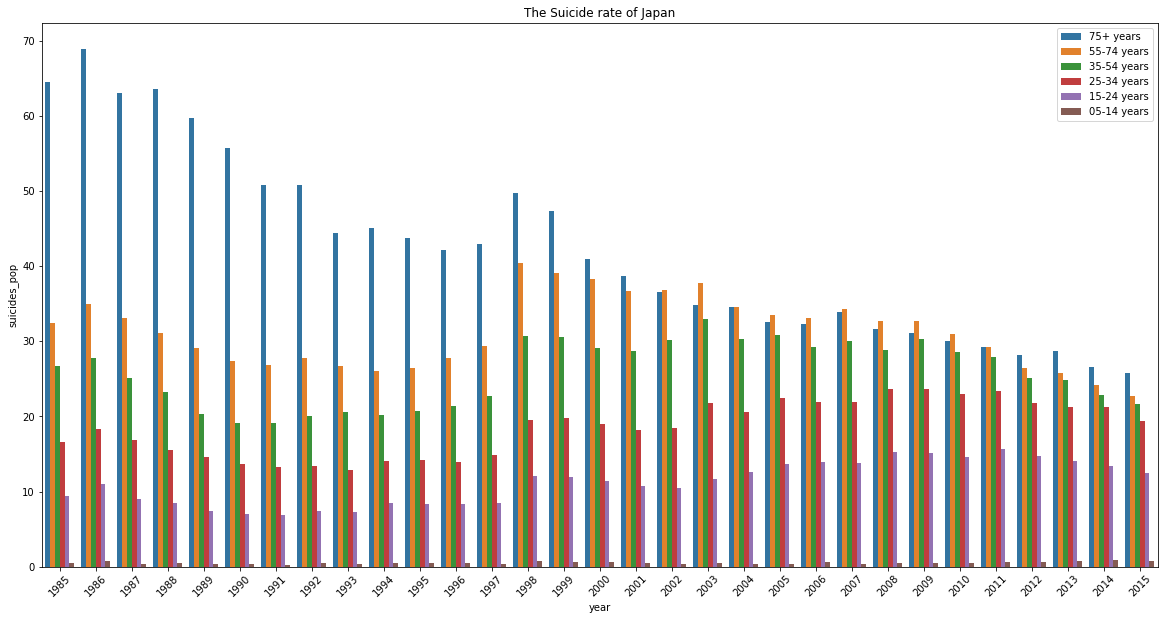

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x="year", y="suicides_pop", hue="age",
           ci = None, data = (df[df["country"] == "Japan"]))
plt.xticks(rotation= 45)
plt.title("The Suicide rate of Japan")
plt.legend()
plt.show()

Suprisingly, the trend seems quite opposite to South Korea that the elderly rate has significantly improved! However, the gap between the ages is getting closer! Therefore despite of the age among society, Japanese are prone to suicidal thoughts and there should be some solution to address and relieve this social pressure.

## Conclusion

From the analysis, we can find some major factors that contribute to the suicide rate among the different countries. First, **National GDP per person** is highly correlated with the suicide rate in the majority of the countries. The correlation shows that the degress of national wealth has a significant impact to the reduction in suicide rate. For instance, wealthier countries seem to have better healthcare system and policies to support the minorities.

Second, **The Age**. We can clearly see from the graphs that the suicide rate among the seniors is higher than the younger people. There could be some critical problems in terms of the welfare and support for the elderly that contribute to the high rate.

Third, **The Social Pressure**. A country where the citizens feel happy, satisfied, and safe could help to lower the social pressure. For some Asian countries like South Korea, we can see a huge pressure among the younger people, especially the students, according to an article from [NPR](https://www.npr.org/sections/parallels/2015/04/15/393939759/the-all-work-no-play-culture-of-south-korean-education). 

When we are more aware of all the factors that could contribute to the suicide rate among different countries, we could learn the lession and build a better system to help and support our society.